#### Overview
FordGoBike System Data is used
The FordGoBikeSystem dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. in 2017.

###### There are fordgobike trips in the dataset with 16 specifications 
`duration_sec`, `start_time`, `end_time`, `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude` ,`end_station_longitude`, `bike_id, user_type`, `member_birth_year`, `member_gender`, `bike_share_for_all_trip`. Out of 16 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type. (Kaggle)
​

Project Details:

1) Dataset : https://www.fordgobike.com/system-data <br>
2) Exploring Data <br> 
3) Document the Story <br> 
4) Communicating the Story

---

###### `Explanatory data visualization` 
techniques are used after generating your findings, and are used to help communicate your results to others. Understanding design considerations will make sure that your message is clear and effective. In addition to being a good producer of visualizations, going through this project will also help you be a good consumer of visualizations that are presented to you by others.

---

### Data Wrangling:
##### 1.1 Importing Data

##### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os

plt.rcParams['figure.figsize'] = [14, 8]

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
# make a copy of the dataframe 
# fix multiple fields dtype
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

##### Data Cleaning and Preparing:

In [4]:
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)
df.user_type  = df.user_type.astype('category')

df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')
df['member_gender'] = df['member_gender'].astype('category')

df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour_day'] = df.start_time.dt.strftime('%H')
df['start_day_week'] = df.start_time.dt.strftime('%A')
df['start_month'] =  df.start_time.dt.strftime('%B')
df['year'] = df.start_time.dt.strftime('%Y')
df['duration_minute'] = df['duration_sec'] / 60

df['end_hour_day'] = df.end_time.dt.strftime('%H')
df['member_age'] = 2021 - df['member_birth_year']

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_category = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_day_week'] = df['start_day_week'].astype(weekday_category)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_category = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df['start_month'] = df['start_month'].astype(month_category)

customers = df.query('user_type == "Customer"')
subscribers = df.query('user_type == "Subscriber"')

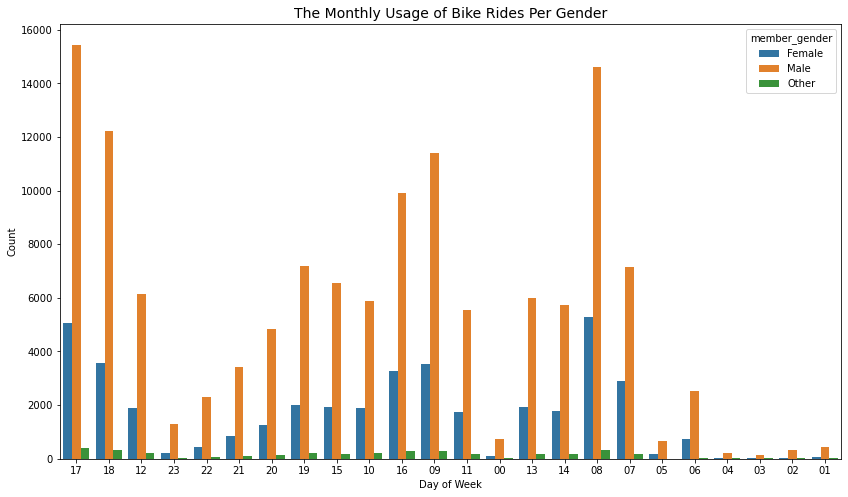

In [8]:
base_color = sb.color_palette()[0]

sb.countplot(data=df, x='start_hour_day', hue='member_gender');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('The Monthly Usage of Bike Rides Per Gender', fontsize=14);

---
- Hourly usage of the bikes by Customers and Subscribers in this station

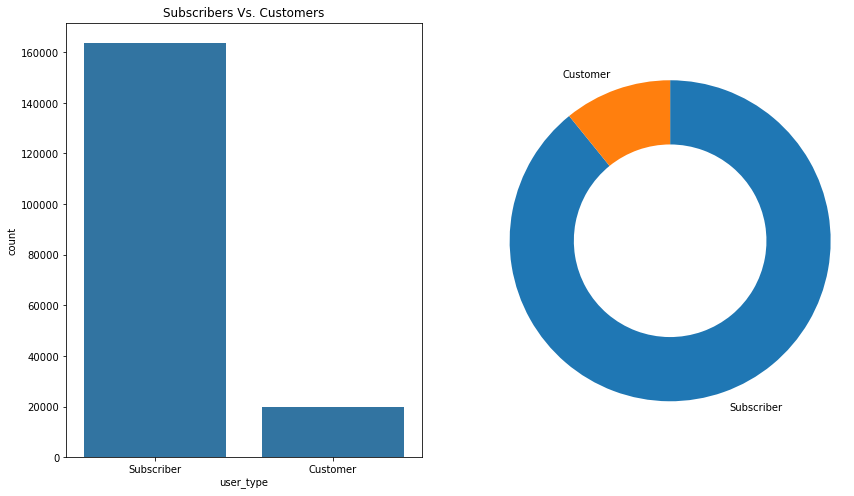

In [9]:
plt.subplot(1,2,1)
sb.countplot(data=df, x='user_type', color=base_color, order = df.user_type.value_counts().index)
plt.title('Subscribers Vs. Customers');

plt.subplot(1,2,2)
sorted_counts = df['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

---
- Subscribers ride much shorter trips compared to customers on each day of the week. Both user types had an obvious increase of trip duration on Saturdays and Sundays

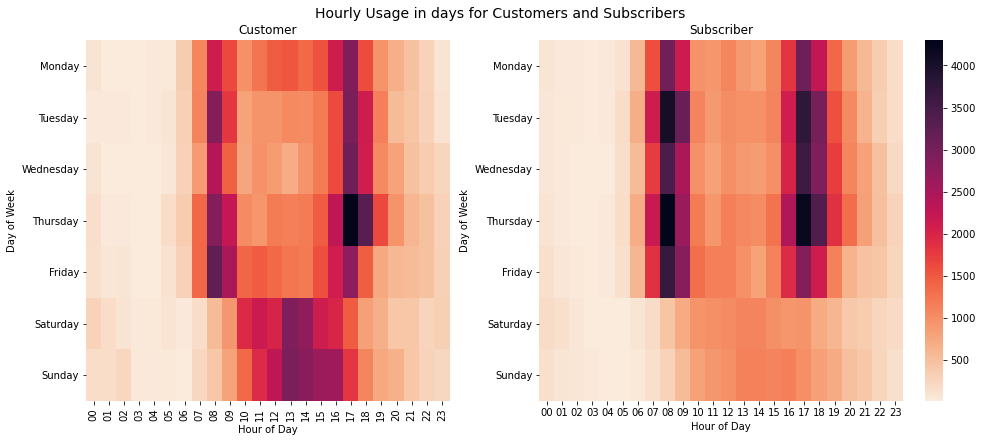

In [21]:
plt.figure(figsize=[14, 6]);

plt.subplot(1, 2, 1)
ct_counts = customers.groupby(['start_day_week', 'start_hour_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_week', columns='start_hour_day', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.subplot(1, 2, 2)
st_counts = subscribers.groupby(['start_day_week', 'start_hour_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_week', columns='start_hour_day', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();
plt.suptitle('Hourly Usage in days for Customers and Subscribers', fontsize=14, y=1.015);

---
males are using the system more in Thursday and Tuesday.
males are using the system more in Thursday and Tuesday.
Others are using the system more in Thursday.

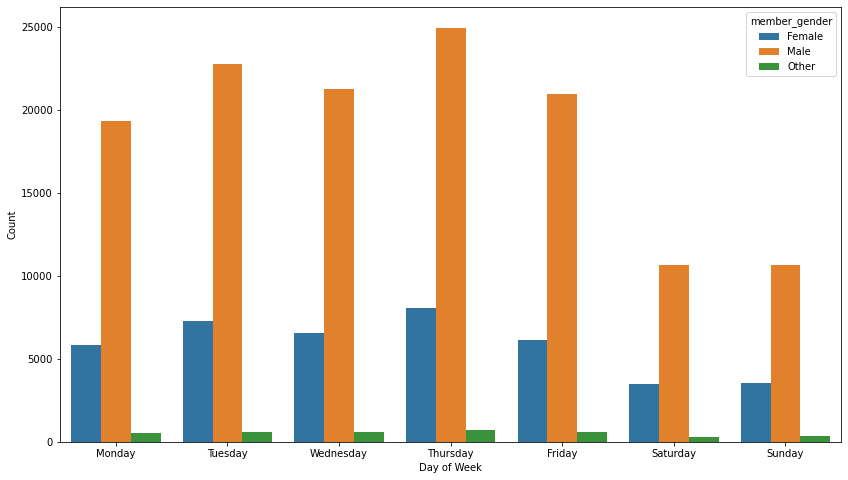

In [20]:
sb.countplot(data=df, x='start_day_week', hue='member_gender');
plt.xlabel('Day of Week');
plt.ylabel('Count');

#### Summary And Insights:
- it Appears that males have the dominant ratio of the Members Gender for the users of the Bike Sharing System
- people who are 33 years old are using the system more than any one else!
- Subscribers are the most users of the system!
- Most users are registering on the system between 8 AM and 5 PM, Who is using the system by then?
- Thursday is the most day that the system starts its work at!
- The Visualization shows that most member are using the system from 0 to 200 minutes more than else!
- Subscribers are using the system in a wide manner. i Think most of them made the subscribtion in order to use it going to work!
- Males are using the system more widely.
- Saturdays and Sundays have the longest duration!
- Females are Taking Longer Trips than males and others!
- it seems like Thursday and Tuesday has the most time of usage for subscribers!
- it seems like Thursday and Friday has the most time of usage for Customers, may be using for touring or having fun!
- males are using the system more in Thursday and Tuesday.
- males are using the system more in Thursday and Tuesday.
- Others are using the system more in Thursday.
- Subscribers use the system more between 17-8, and also customers.